In [179]:
import sys
sys.path.insert(1, "/Users/mkurka/git/h2o/h2o-3/h2o-py")

import h2o
from h2o.frame import H2OFrame
import numpy as np
import pandas as pd

In [180]:
h2o.init(strict_version_check=False)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,47 mins 01 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.31.0.99999
H2O_cluster_version_age:,52 minutes
H2O_cluster_name:,mkurka
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.234 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [181]:
N = 1000
cont = 0.05

In [182]:
regular_data = np.random.normal(0, 0.5, (int(N*(1-cont)), 2))
anomaly_data = np.column_stack((np.random.normal(-1.5, 1, int(N*cont)), np.random.normal(1.5, 1, int(N*cont))))

In [183]:
import matplotlib.pyplot as plt

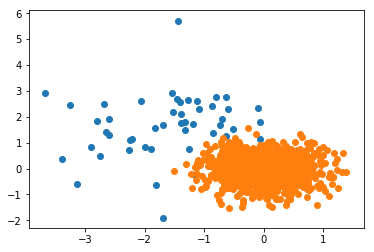

In [184]:
plt.scatter(anomaly_data[:,0], anomaly_data[:,1])
plt.scatter(regular_data[:,0], regular_data[:,1])
plt.show()

In [185]:
regular_pd = pd.DataFrame({'x': regular_data[:, 0], 'y': regular_data[:, 1], 'label': np.zeros(regular_data.shape[0])})
anomaly_pd = pd.DataFrame({'x': anomaly_data[:, 0], 'y': anomaly_data[:, 1], 'label': np.ones(anomaly_data.shape[0])})

In [186]:
dataset = H2OFrame(regular_pd.append(anomaly_pd).sample(frac=1))

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [187]:
train_with_label, test = dataset.split_frame([0.8])

In [188]:
train_with_label["label"].table()

label,Count
0,751
1,43


In [189]:
test["label"].table()

label,Count
0,199
1,7


In [190]:
train = train_with_label.drop(["label"])
test["label"] = test["label"].asfactor()

In [191]:
from h2o.estimators.isolation_forest import H2OIsolationForestEstimator
from h2o.model.metrics_base import H2OAnomalyDetectionModelMetrics, H2OBinomialModelMetrics

### Train Isolation Forest with a validation set

In [202]:
if_model = H2OIsolationForestEstimator(seed=12, response_column="label", score_tree_interval=5, stopping_metric="auc")
if_model.train(training_frame=train, validation_frame=test)

H2OTypeError: Argument `stopping_metric` should be a ?Enum["auto", "anomalyscore"], got string auc

In [193]:
if_model

Model Details
H2OIsolationForestEstimator :  Isolation Forest
Model Key:  IsolationForest_model_python_1593195799648_424


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,40360.0,8.0,8.0,8.0,14.0,97.0,59.62




ModelMetricsAnomaly: isolationforest
** Reported on train data. **

Anomaly Score: 6.71923031315
Normalized Anomaly Score: 0.0652952760127

ModelMetricsBinomial: isolationforest
** Reported on validation data. **

MSE: 0.0169122117965
RMSE: 0.130046959966
LogLoss: 0.076300893937
Mean Per-Class Error: 0.0100502512563
AUC: 0.992821249103
AUCPR: 0.822791668942
Gini: 0.985642498205

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.274418604651: 


,,0,1,Error,Rate
0,0,195.0,4.0,0.0201,(4.0/199.0)
1,1,0.0,7.0,0.0,(0.0/7.0)
2,Total,195.0,11.0,0.0194,(4.0/206.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.274419,0.777778,8.0
1,max f2,0.274419,0.897436,8.0
2,max f0point5,0.567442,0.789474,2.0
3,max accuracy,0.567442,0.980583,2.0
4,max precision,0.897674,1.000000,0.0
5,max recall,0.274419,1.000000,8.0
6,max specificity,0.897674,1.000000,0.0
7,max absolute_mcc,0.274419,0.789666,8.0
8,max min_per_class_accuracy,0.274419,0.979899,8.0
9,max mean_per_class_accuracy,0.274419,0.989950,8.0



Scoring History: 


,,timestamp,duration,number_of_trees,mean_tree_path_length,mean_anomaly_score
0,,2020-06-26 15:10:21,0.003 sec,0.0,NaN,NaN
1,,2020-06-26 15:10:21,0.009 sec,1.0,6.721374,0.046438
2,,2020-06-26 15:10:21,0.011 sec,2.0,6.690029,0.061994
3,,2020-06-26 15:10:21,0.014 sec,3.0,6.719459,0.049507
4,,2020-06-26 15:10:21,0.016 sec,4.0,6.722294,0.065343
5,,2020-06-26 15:10:21,0.019 sec,5.0,6.737194,0.057132
6,,2020-06-26 15:10:21,0.022 sec,6.0,6.727799,0.058329
7,,2020-06-26 15:10:21,0.026 sec,7.0,6.721438,0.062901
8,,2020-06-26 15:10:21,0.029 sec,8.0,6.716128,0.068817
9,,2020-06-26 15:10:21,0.034 sec,9.0,6.726224,0.063179



See the whole table with table.as_data_frame()


In [194]:
predicted_train_labels = if_model.predict(train)["predict"].as_data_frame(use_pandas=True)

isolationforest prediction progress: |████████████████████████████████████| 100%


In [195]:
train_pd = train.as_data_frame(use_pandas=True)

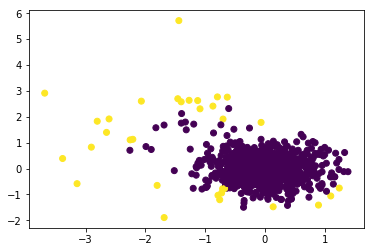

In [196]:
plt.scatter(train_pd["x"], train_pd["y"], c=predicted_train_labels["predict"])
plt.show()

In [197]:
if_model.model_performance(train_with_label)


ModelMetricsBinomial: isolationforest
** Reported on test data. **

MSE: 0.0307701759955
RMSE: 0.17541429815
LogLoss: 0.115668304637
Mean Per-Class Error: 0.0987520515282
AUC: 0.943176539807
AUCPR: 0.701515799094
Gini: 0.886353079615

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.241860465116: 


,,0,1,Error,Rate
0,0,738.0,13.0,0.0173,(13.0/751.0)
1,1,16.0,27.0,0.3721,(16.0/43.0)
2,Total,754.0,40.0,0.0365,(29.0/794.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.241860,0.650602,27.0
1,max f2,0.144186,0.701107,46.0
2,max f0point5,0.367442,0.720721,14.0
3,max accuracy,0.367442,0.964736,14.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.004651,1.000000,76.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.241860,0.631819,27.0
8,max min_per_class_accuracy,0.116279,0.886818,52.0
9,max mean_per_class_accuracy,0.144186,0.901248,46.0


### Train Isolation Forest using contamination parameter

In [198]:
if_model_cont = H2OIsolationForestEstimator(seed=12, contamination=cont)
if_model_cont.train(training_frame=train)
if_model_cont

isolationforest Model Build progress: |███████████████████████████████████| 100%
Model Details
H2OIsolationForestEstimator :  Isolation Forest
Model Key:  IsolationForest_model_python_1593195799648_425


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,40359.0,8.0,8.0,8.0,14.0,97.0,59.62




ModelMetricsAnomaly: isolationforest
** Reported on train data. **

Anomaly Score: 6.71923031315
Normalized Anomaly Score: 0.0652952760127

Scoring History: 


,,timestamp,duration,number_of_trees,mean_tree_path_length,mean_anomaly_score
0,,2020-06-26 15:10:23,0.003 sec,0.0,NaN,NaN
1,,2020-06-26 15:10:23,0.008 sec,1.0,6.721374,0.046438
2,,2020-06-26 15:10:23,0.016 sec,2.0,6.690029,0.061994
3,,2020-06-26 15:10:23,0.023 sec,3.0,6.719459,0.049507
4,,2020-06-26 15:10:23,0.029 sec,4.0,6.722294,0.065343
5,,2020-06-26 15:10:23,0.033 sec,5.0,6.737194,0.057132
6,,2020-06-26 15:10:23,0.040 sec,6.0,6.727799,0.058329
7,,2020-06-26 15:10:23,0.054 sec,7.0,6.721438,0.062901
8,,2020-06-26 15:10:23,0.061 sec,8.0,6.716128,0.068817
9,,2020-06-26 15:10:23,0.066 sec,9.0,6.726224,0.063179



See the whole table with table.as_data_frame()


In [199]:
predicted_train_labels_cont = if_model_cont.predict(train)["predict"].as_data_frame(use_pandas=True)

isolationforest prediction progress: |████████████████████████████████████| 100%


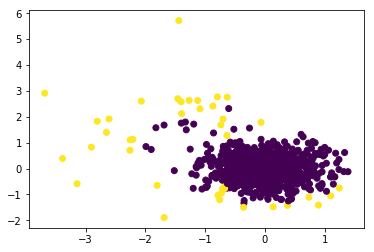

In [200]:
plt.scatter(train_pd["x"], train_pd["y"], c=predicted_train_labels_cont["predict"])
plt.show()